In [41]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is EC5F-E8ED

 Directory of D:\placements\sample_paleru\agumentations

08/10/2020  10:40 AM    <DIR>          .
08/10/2020  10:40 AM    <DIR>          ..
08/09/2020  05:30 PM    <DIR>          .ipynb_checkpoints
08/06/2020  03:28 PM         2,825,780 agumentations.ipynb
08/04/2020  02:26 PM           738,476 audio.wav
08/10/2020  10:39 AM           943,706 cleaned.wav
08/07/2020  06:32 PM         1,895,631 dwt.ipynb
08/04/2020  02:01 PM            46,548 UCLASS.xlsx
08/10/2020  10:40 AM         1,377,846 Untitled.ipynb
               6 File(s)      7,827,987 bytes
               3 Dir(s)  210,517,680,128 bytes free


In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

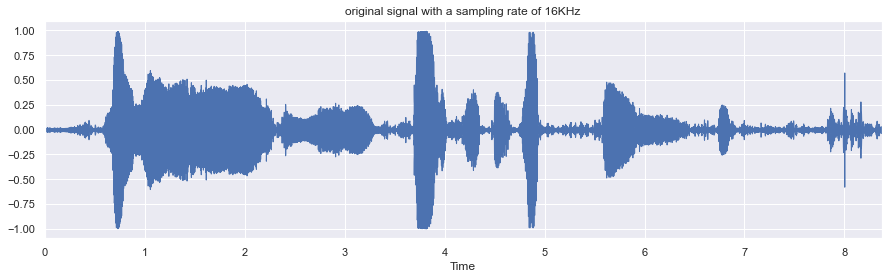

In [43]:
signal, sr = librosa.load('audio.wav',sr = 32000) #signal sampling rate is set to 16000Hz

plt.figure(figsize=(15,4))
plt.title("original signal with a sampling rate of 16KHz")
librosa.display.waveplot(signal,sr)

In [109]:
import scipy
import sys  
from scipy import signal
from scipy import pi
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import numpy as np    
from scipy.signal import butter, lfilter, freqz   
signal, sr = librosa.load('audio.wav',sr = 16000) #signal sampling rate is set to 16000Hz


# signal = signal[1*16000:]
# lo,hi=75,
# b,a=butter(N=6, Wn=[2*lo/sr, 2*hi/sr], btype='band')
fs = sr
cutoff = 75
nyq = 0.5 * fs
order = 5
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='high', analog=False)
x = lfilter(b,a,signal)

highpass_signal =x

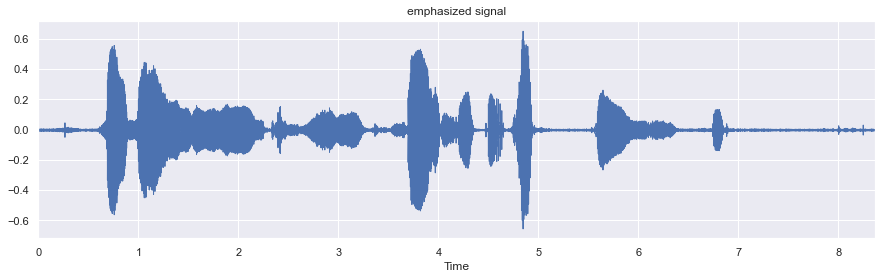

In [110]:
pre_emphasis = 0.97
emphasized_signal = np.append(highpass_signal[0], highpass_signal[1:] - pre_emphasis * highpass_signal[:-1])

#pre-filtering attempts to equalize the effect of high frequency with respect to low frequency components.

plt.figure(figsize=(15,4))
plt.title("emphasized signal")
librosa.display.waveplot(emphasized_signal,sr)

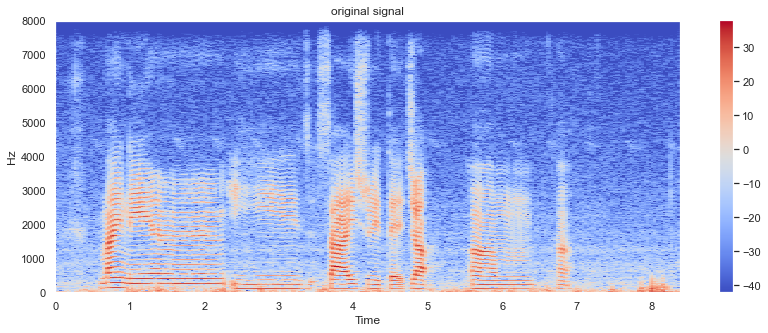

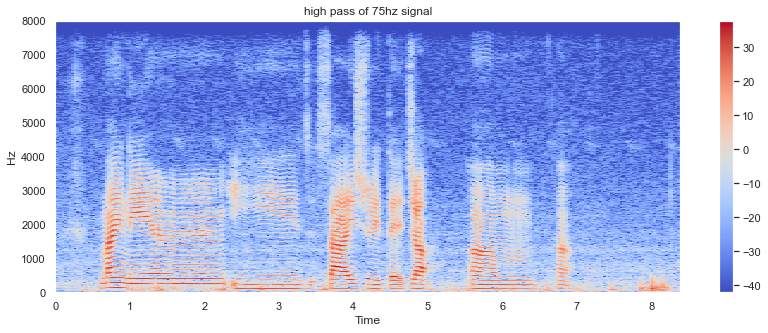

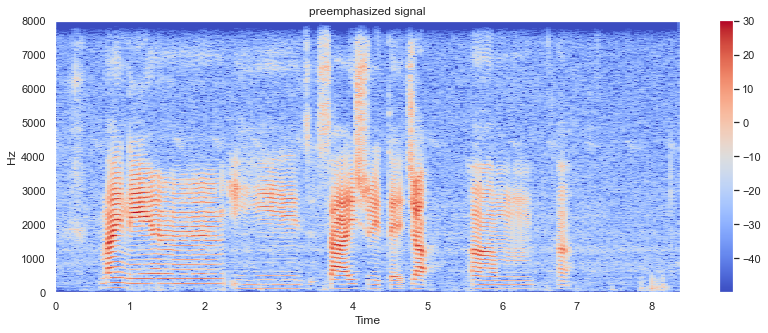

In [111]:
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title("original signal")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

X = librosa.stft(highpass_signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title("high pass of 75hz signal")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

X = librosa.stft(emphasized_signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title("preemphasized signal")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

plt.show()

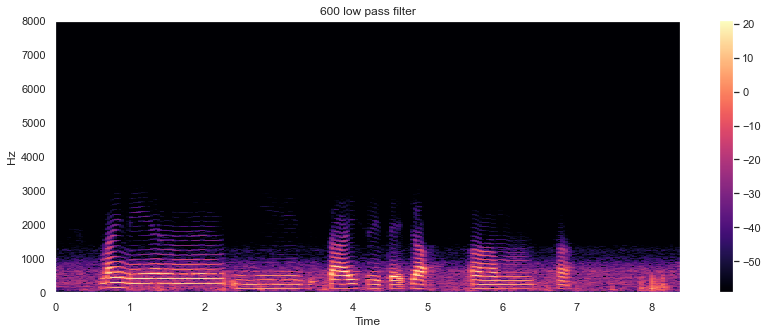

In [47]:
cutoff = 600
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
x = lfilter(b,a,emphasized_signal)

lowpass_signal =x
X = librosa.stft(lowpass_signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title("600 low pass filter")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

plt.show()

In [48]:
import IPython.display as ipd
ipd.Audio(lowpass_signal,rate = sr)

In [49]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs


In [50]:
librosa.output.write_wav('cleaned.wav',lowpass_signal, sr, norm=True)

In [51]:
import sys

In [128]:
from aubio import source, pitch
win_s = 4096
hop_s = 512 

s = source('cleaned.wav', 16000, hop_s)
samplerate = s.samplerate

tolerance = 0.8

pitch_o = pitch("yin", win_s, hop_s, samplerate)
pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitches = []
confidences = []

total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    pitches += [pitch]
    confidence = pitch_o.get_confidence()
    confidences += [confidence]
    total_frames += read
    if read < hop_s: break

print("Average frequency = " + str(np.array(pitches).mean()) + " hz")

Average frequency = 57.15722 hz


In [129]:
t = librosa.get_duration(signal)

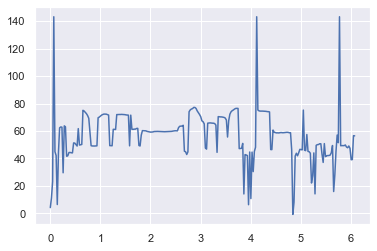

In [130]:
x = np.linspace(0,t,len(pitches))
plt.plot(x,pitches)

In [131]:
from numpy import inf,isnan
# pitches

In [132]:
pitches = 12*(np.log(pitches))/(np.log(2))

C:\Users\lenovo\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [133]:
import numpy as np

def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

y = pitches
nans, x= nan_helper(y)
y[nans]= np.interp(x(nans), x(~nans), y[~nans])
pitches = y

In [134]:
#normalize 
x = pitches
norm1 = x / np.linalg.norm(x)
median = norm1

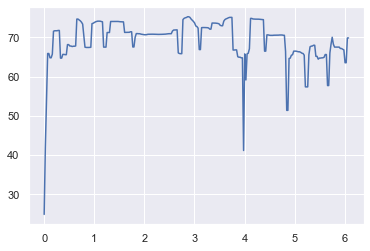

In [135]:
median = scipy.signal.medfilt(pitches, kernel_size=3)
x = np.linspace(0,t,len(median))
plt.plot(x,median)

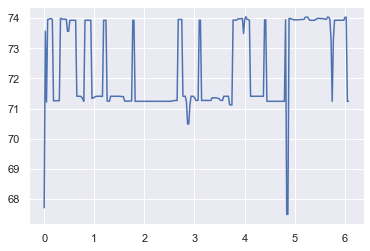

In [136]:
from scipy.interpolate import interp1d
x = np.arange(0,len(median),1)
f = interp1d(x, median)
m = f(median)
x = np.linspace(0,t,len(pitches))
plt.plot(x,m)

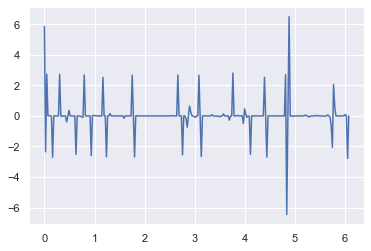

In [137]:
f_m = f(median)
f0_postprocessing = np.append(f_m[0], f_m[1:] - f_m[:-1])
x = np.linspace(0,t,len(f0_postprocessing[1:]))
plt.plot(x,f0_postprocessing[1:])

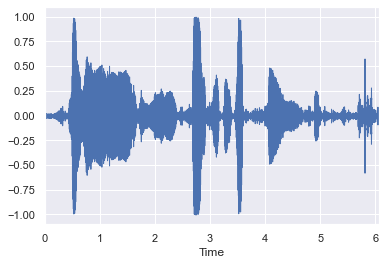

In [125]:
librosa.display.waveplot(signal)

In [126]:
hop_length = 1024
frame_length = 512

x= signal

energy = np.array([
    10*np.log(sum(abs(x[i:i+frame_length]**2)))
    for i in range(0, len(x), hop_length)
])

frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

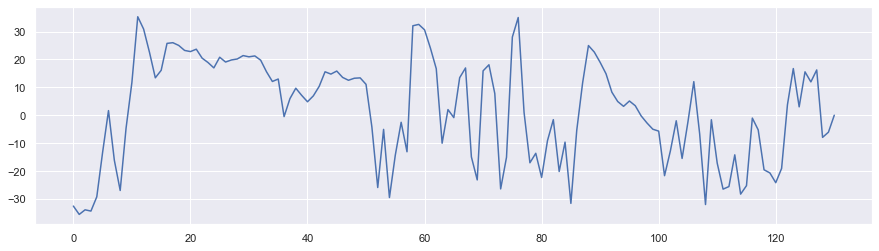

In [96]:
plt.figure(figsize=(15,4))

# librosa.display.waveplot(signal,sr)
plt.plot(energy)
# plt.ylim(-1,1)

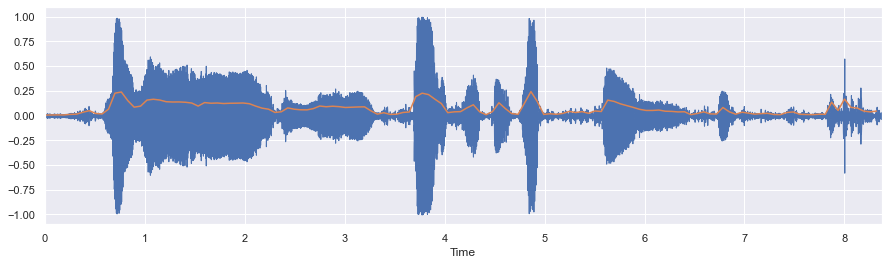

In [106]:
rmse = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length)
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15,4))

librosa.display.waveplot(signal,sr)

plt.plot(t,rmse[0])